# Regresiones Lineales Simples

En este notebook, analizaremos la relación entre la altura y el peso de las personas. Contestaremos las siguientes preguntas:

- ¿Existe una relación entre peso y altura?
- En caso de existir, ¿será una relación lineal?
- ¿Se podrá predecir el peso de una persona a partir de su altura?
- ¿Cuán buena podría ser esa predicción?

Para esto, tomaremos el dataset SOCR Human Height/Weight. Más información en el siguiente link:
http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

Link al dataset:
http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('SOCR-HeightWeight.csv', index_col=0)

In [10]:
df.columns = ['Height', 'Weight']

In [11]:
df

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

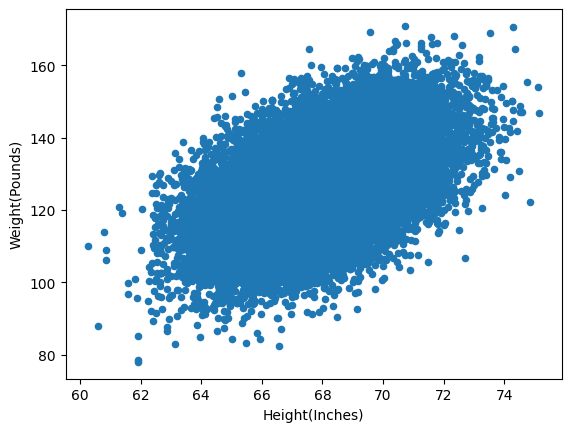

In [5]:
df.plot(kind='scatter', x='Height(Inches)', y='Weight(Pounds)')

In [6]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


# Hipótesis de Trabajo

"El peso de un individuo depende de su altura, y tiene una relación lineal."

In [7]:
import statsmodels.formula.api as smf

In [13]:
lm = smf.ols(data=df, formula="Weight ~ Height").fit()

In [14]:
lm.params

Intercept   -82.575743
Height        3.083476
dtype: float64

In [15]:
lm.params[0]

-82.57574306454089

In [16]:
lm.params[1]

3.0834764454029653

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8461.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:58:07   Log-Likelihood:                -93235.
No. Observations:               25000   AIC:                         1.865e+05
Df Residuals:                   24998   BIC:                         1.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -82.5757      2.280    -36.214      0.000     -87.045     -78.106
Height         3.0835      0.034     91.981      0.000       3.018       3.149
==============================================================================
Omnibus:                        1.022   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.027
Skew:                          -0.016   Prob(JB):                        0.598
Kurtosis:                       2.996   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Realizando Predicciones

In [20]:
x = pd.DataFrame([60, 65, 70, 75, 80], columns=['Height'])
x

,Height
0,60
1,65
2,70
3,75
4,80


In [21]:
lm.predict(x)

0    102.432844
1    117.850226
2    133.267608
3    148.684990
4    164.102373
dtype: float64

### Inspeccionando los resultados

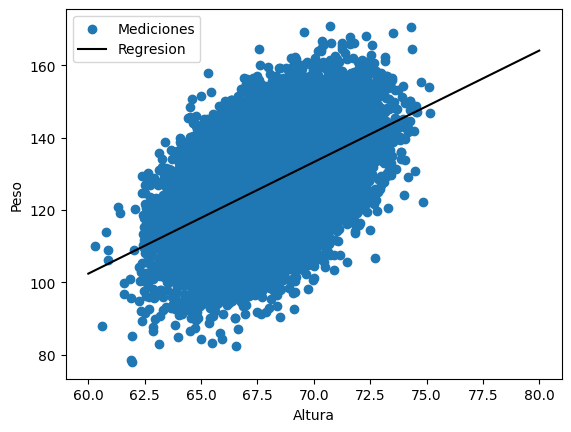

In [24]:
plt.scatter(df['Height'], df['Weight'], label='Mediciones')
plt.plot(x,lm.predict(x), c='black', label='Regresion')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend(loc=0)

### Análisis de Residuales

In [25]:
y_pred = lm.predict(df['Height'])
y_true = df['Weight']

<Axes: ylabel='Density'>

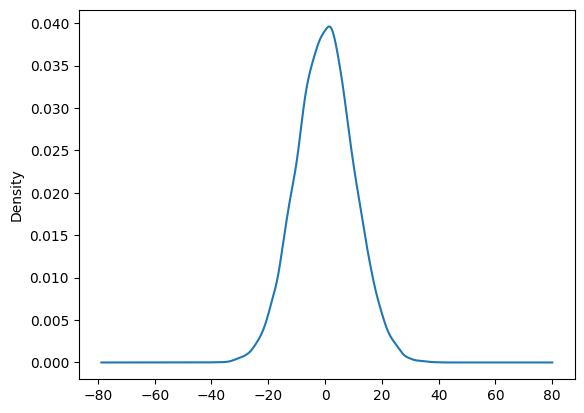

In [27]:
(y_pred - y_true).plot(kind='kde')

## Métricas de Evaluación del Modelo


In [28]:
import statsmodels.tools.eval_measures as metrics

In [29]:
# Mean Absolute Error
metrics.meanabs(y_true,y_pred)

8.037502348939364

In [30]:
# Mean Squared Error
metrics.mse(y_true,y_pred)

101.58853248632849

In [31]:
# Root Medium Squared Error
metrics.rmse(y_true,y_pred)

10.079113675632819

In [34]:
# r2
lm.rsquared

0.25286669174288057